In [1]:
!uv pip install seaborn

Using Python 3.14.0 environment at: /home/lhambrec/DroneSimWSL/.venv
Resolved 15 packages in 152ms                                        
Installed 1 package in 71ms                                 
 + seaborn==0.13.2


In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import math
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from matplotlib.lines import Line2D

# Set the font family to Arial
plt.rcParams['font.family'] = 'Arial'

# Construct the relative path to the CSV file
file_path = os.path.join('..', '..', 'Output', 'Simulation', 'sim_comparison.csv')

# Load the CSV file
df = pd.read_csv(file_path)
# Renaming columns
df.rename(
    columns={'Unnamed: 0': 'WMU', 'Mean_estimated_Density': 'Mean estimated Density', 'True_Density': 'True Density',
             'Mean_relative_Estimate': 'Relative mean estimate', 'Percent_Bias': 'Bias (%)', 'RRMSE': 'Relative RMSE',
             'CI_Coverage_Prob': 'Probortion 95% CI', 'Mean_SE': 'Mean se', 'CV': 'Coefficient of variation',
             'Mean_ER': 'Mean encounter rate', 'Mean_se_ER': 'Mean standard error ER'}, inplace=True)

# Remove the iteration number and keep only the first 6 characters
df['WMU'] = df['WMU'].str.slice(0, 6)

# Dictionary to map old simulation names to new ones
simulation_rename_dict = {
    'FW-Sys_2C': 'Fixed-wing Systematic 2 Cameras',
    'FW-ZZ_2C': 'Fixed-wing Zigzag 2 Cameras',
    'FW-Sys_G': 'Fixed-wing Systematic Gimbal',
    'FW-ZZ_G': 'Fixed-wing Zigzag Gimbal',
    'QC-Sys_NADIR': 'Quadcopter nadir',
    'QC-Sys': 'Quadcopter Gimbal',
    'H-SG': 'Helicopter',
    'SW' : 'Fixed-wing Segement Grid Gimbal'
}
# Renaming the simulations
df['Simulation'] = df['Simulation'].replace(simulation_rename_dict)



In [2]:
# Display the first few rows of the dataframe
print(df)
print(df.columns)

       WMU                       Simulation  Mean estimated Density  \
0   WMU501  Fixed-wing Systematic 2 Cameras                   0.236   
1   WMU501      Fixed-wing Zigzag 2 Cameras                   0.235   
2   WMU501     Fixed-wing Systematic Gimbal                   0.231   
3   WMU501         Fixed-wing Zigzag Gimbal                   0.232   
4   WMU501                 Quadcopter nadir                   0.240   
5   WMU501                Quadcopter Gimbal                   0.217   
6   WMU501                       Helicopter                     NaN   
7   WMU501  Fixed-wing Segement Grid Gimbal                   0.237   
8   WMU503  Fixed-wing Systematic 2 Cameras                   0.481   
9   WMU503      Fixed-wing Zigzag 2 Cameras                   0.479   
10  WMU503     Fixed-wing Systematic Gimbal                   0.475   
11  WMU503         Fixed-wing Zigzag Gimbal                   0.475   
12  WMU503                 Quadcopter nadir                   0.449   
13  WM

/tmp/ipykernel_22781/4220746227.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Simulation', y=column, data=df, ax=axes[i], palette=palette)
/tmp/ipykernel_22781/4220746227.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels)
/tmp/ipykernel_22781/4220746227.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Simulation', y=column, data=df, ax=axes[i], palette=palette)
/tmp/ipykernel_22781/4220746227.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels

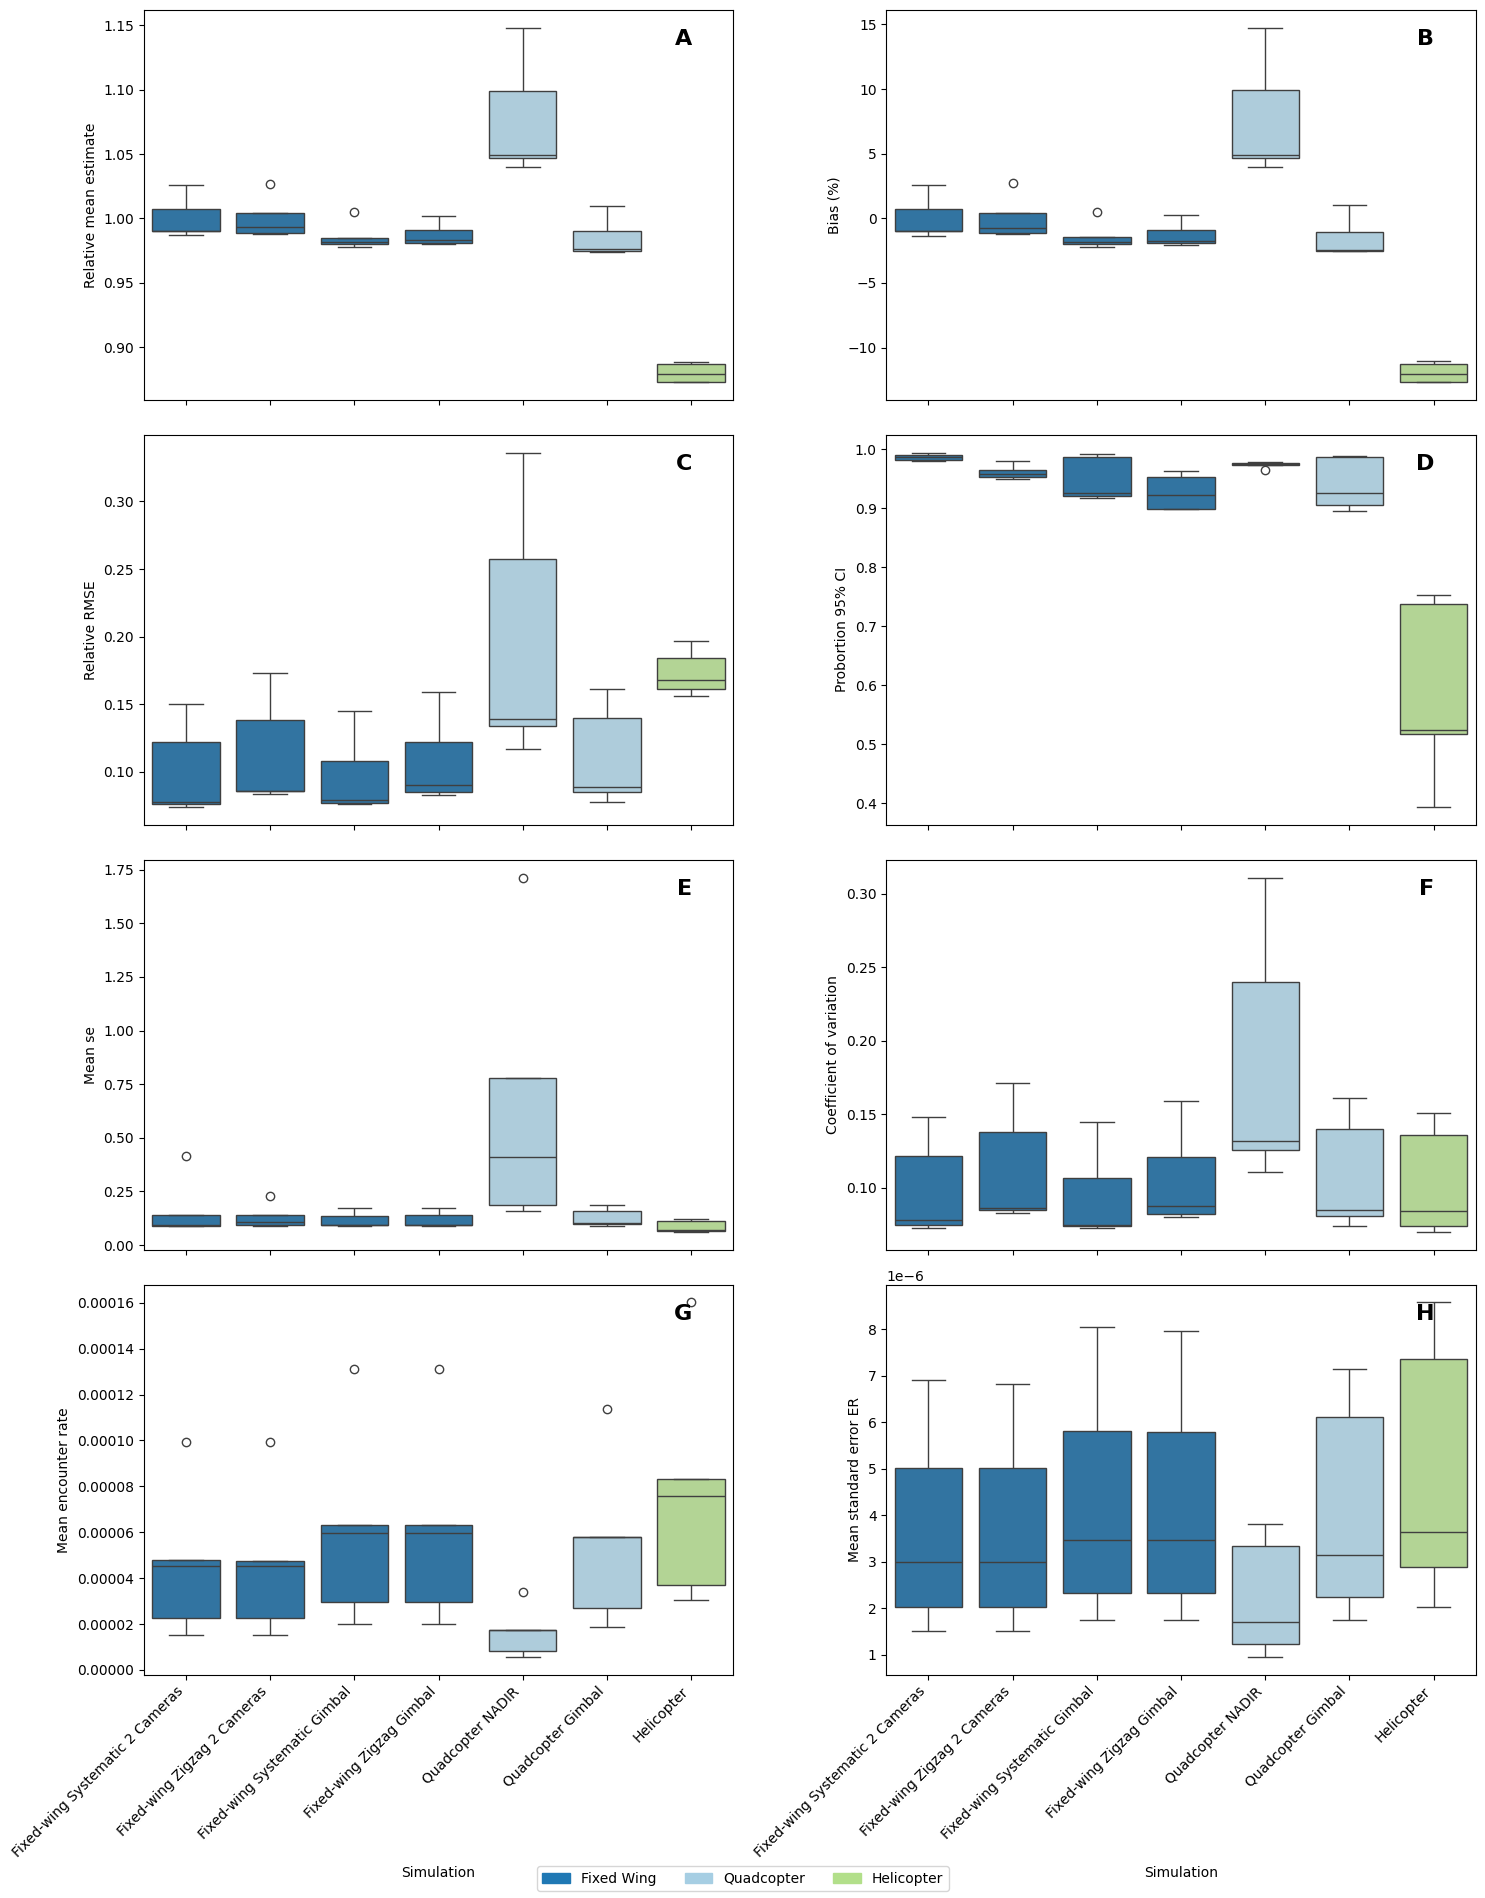

In [16]:

# List of column indices to plot (0-based index)
columns_to_plot = [4, 5, 6, 7, 8, 9, 10, 11]  # Example: columns 4-6# List of column indices to plot (0-based index)

# Number of columns to plot
num_columns = len(columns_to_plot)

# Calculate the number of rows and columns for the subplots
ncols = 2
nrows = math.ceil(num_columns / ncols)

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the axes array for easy iteration
axes = axes.flatten()


# Define a function to assign colors based on 'Simulation' values
def get_color(simulation):
    if simulation.startswith('Fixed'):
        return '#1f78b4'
    elif simulation.startswith('Quadcopter'):
        return '#a6cee3'
    else:
        return '#b2df8a'


# Letters to annotate subplots
letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

# Loop through each specified column in the DataFrame
for i, col_index in enumerate(columns_to_plot):
    column = df.columns[col_index]

    # Create a color palette based on the 'Simulation' column
    palette = {sim: get_color(sim) for sim in df['Simulation'].unique()}

    sns.boxplot(x='Simulation', y=column, data=df, ax=axes[i], palette=palette)

    # Add letter annotation in the top right corner
    axes[i].text(0.93, 0.95, letters[i], transform=axes[i].transAxes,
                 fontsize=16, fontweight='bold', va='top', ha='right')

    # Add title and labels
    # axes[i].set_title(f'Boxplot of {column} by Simulation')
    axes[i].set_ylabel(column)

    # Rotate x-axis labels
    axes[i].tick_params(axis='x', rotation=45)
    labels = axes[i].get_xticklabels()
    for label in labels:
        label.set_ha('right')  # Move labels to the left
    axes[i].set_xticklabels(labels)

    # Hide x-axis labels for all but the last row of subplots
    if i < (nrows - 1) * ncols:
        axes[i].set_xlabel('')
        axes[i].set_xticklabels([])

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Create custom legend handles
legend_handles = [
    Patch(color='#1f78b4', label='Fixed Wing'),
    Patch(color='#a6cee3', label='Quadcopter'),
    Patch(color='#b2df8a', label='Helicopter')
]

# Add the legend to the figure
fig.legend(handles=legend_handles, loc='lower center', ncol=3)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make space for the legend

# Save the plot as a TIFF file to the specified relative path
output_path = os.path.join('..', '..', 'Output', 'Plots', 'simMetrics.tiff')
plt.savefig(output_path, format='tiff', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

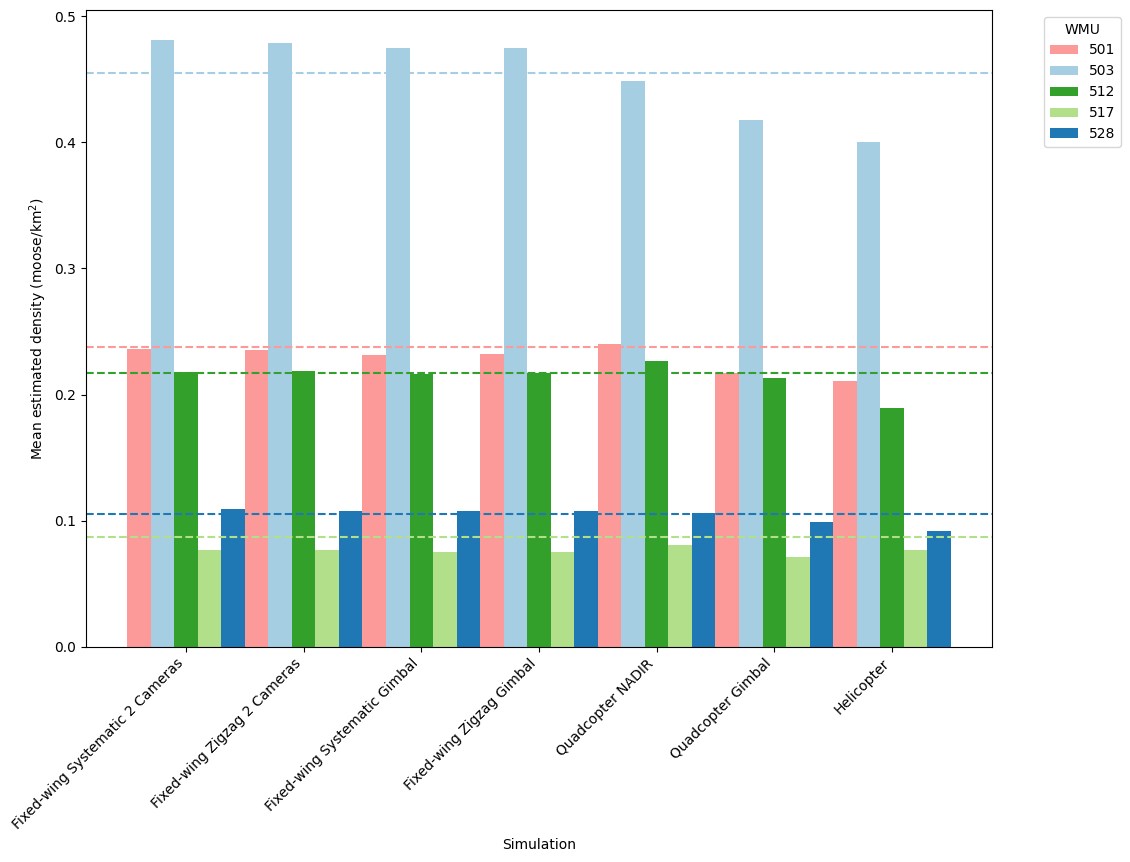

In [17]:
# Predefined colors for each WMU
wmu_colors = {
    'WMU501': '#fb9a99',  # Pink
    'WMU503': '#a6cee3',  # light Blue
    'WMU512': '#33a02c',  # Green
    'WMU517': '#b2df8a',  # light Green
    'WMU528': '#1f78b4'  # Blue
}

# Custom legend labels
wmu_labels = {
    'WMU501': '501',
    'WMU503': '503',
    'WMU512': '512',
    'WMU517': '517',
    'WMU528': '528'
}

# Plotting
fig, ax = plt.subplots(figsize=(11.69, 8.27))  # A4 size in landscape orientation

# Group by WMU and plot each group
bar_width = 0.2
categories = df['Simulation'].unique()
x = range(len(categories))

for i, (key, grp) in enumerate(df.groupby('WMU')):
    color = wmu_colors.get(key, '#000000')  # Default to black if WMU not found
    label = wmu_labels.get(key, key)  # Use custom label if available, otherwise use key
    ax.bar([p + i * bar_width for p in x], grp['Mean estimated Density'], width=bar_width, label=label, color=color,
           align='center')
    true_density = grp['True Density'].iloc[6]  # Assuming True Density is the same for each group
    ax.axhline(y=true_density, linestyle='--', color=color, label='_nolegend_')

# Adding labels and title
ax.set_xlabel('Simulation')
ax.set_ylabel('Mean estimated density (moose/km$^2$)')
ax.set_xticks([p + bar_width * (len(wmu_labels) - 1) / 2 for p in x])
ax.set_xticklabels(categories, rotation=45, ha='right')

# ax.set_title('Bar Plot of Simulation vs Mean estimated Density')
# Place legend outside the plot
ax.legend(title='WMU', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot as a TIFF file to the specified relative path
output_path = os.path.join('..', '..', 'Output', 'Plots', 'meanDensityType.tiff')
plt.savefig(output_path, format='tiff', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

In [3]:
# Construct the relative path to the CSV file
file_path = os.path.join('..', '..', 'Output', 'Simulation', 'density_sim_comparison.csv')

# Load the CSV file
df = pd.read_csv(file_path)
# Renaming columns
df.rename(columns={'Unnamed: 0': 'ID', 'WMU': 'WMU', 'Density': 'Density', 'Simulation': 'Simulation',
                   'Mean_estimated_Density': 'Mean estimated Density', 'True_Density': 'True Density',
                   'Mean_relative_Estimate': 'Relative mean estimate', 'Percent_Bias': 'Bias (%)',
                   'RRMSE': 'Relative RMSE', 'CI_Coverage_Prob': 'Probortion 95% CI', 'Mean_SE': 'Mean se',
                   'CV': 'Coefficient of variation', 'Mean_ER': 'Mean encounter rate',
                   'Mean_se_ER': 'Mean standard error ER'}, inplace=True)

# Remove the iteration number and keep only the first 6 characters
# df['WMU'] = df['WMU'].str.slice(0, 6)

# Dictionary to map old simulation names to new ones
simulation_rename_dict = {
    'FW-Sys_G': 'Fixed-wing Systematic Gimbal',
    'QC-Sys': 'Quadcopter Gimbal',
    'H-SG': 'Helicopter'
}
# Renaming the simulations
df['Simulation'] = df['Simulation'].replace(simulation_rename_dict)


In [4]:
# Display the first few rows of the dataframe
print(df)
print(df.columns)

                ID  WMU  Density                    Simulation  \
0   WMU503_D0.25.1  503     0.25  Fixed-wing Systematic Gimbal   
1   WMU503_D0.25.2  503     0.25             Quadcopter Gimbal   
2   WMU503_D0.25.3  503     0.25                    Helicopter   
3    WMU503_D0.5.1  503     0.50  Fixed-wing Systematic Gimbal   
4    WMU503_D0.5.2  503     0.50             Quadcopter Gimbal   
5    WMU503_D0.5.3  503     0.50                    Helicopter   
6   WMU503_D0.75.1  503     0.75  Fixed-wing Systematic Gimbal   
7   WMU503_D0.75.2  503     0.75             Quadcopter Gimbal   
8   WMU503_D0.75.3  503     0.75                    Helicopter   
9      WMU503_D1.1  503     1.00  Fixed-wing Systematic Gimbal   
10     WMU503_D1.2  503     1.00             Quadcopter Gimbal   
11     WMU503_D1.3  503     1.00                    Helicopter   
12  WMU517_D0.25.1  517     0.25  Fixed-wing Systematic Gimbal   
13  WMU517_D0.25.2  517     0.25             Quadcopter Gimbal   
14  WMU517

In [5]:
# Filter and print rows where the 'Simulation' column contains 'Quadcopter'
quadcopter_rows = df[df['Simulation'] == 'Quadcopter Gimbal']
print(quadcopter_rows)

                ID  WMU  Density         Simulation  Mean estimated Density  \
1   WMU503_D0.25.2  503     0.25  Quadcopter Gimbal                   0.128   
4    WMU503_D0.5.2  503     0.50  Quadcopter Gimbal                   0.230   
7   WMU503_D0.75.2  503     0.75  Quadcopter Gimbal                   0.344   
10     WMU503_D1.2  503     1.00  Quadcopter Gimbal                   0.394   
13  WMU517_D0.25.2  517     0.25  Quadcopter Gimbal                   0.019   
16   WMU517_D0.5.2  517     0.50  Quadcopter Gimbal                   0.071   
19  WMU517_D0.75.2  517     0.75  Quadcopter Gimbal                   0.087   
22     WMU517_D1.2  517     1.00  Quadcopter Gimbal                   0.086   

    True Density  Relative mean estimate  Bias (%)  Relative RMSE  \
1          0.101                   1.270    27.019          0.257   
4          0.202                   1.137    13.715          0.159   
7          0.303                   1.134    13.361          0.148   
10         0

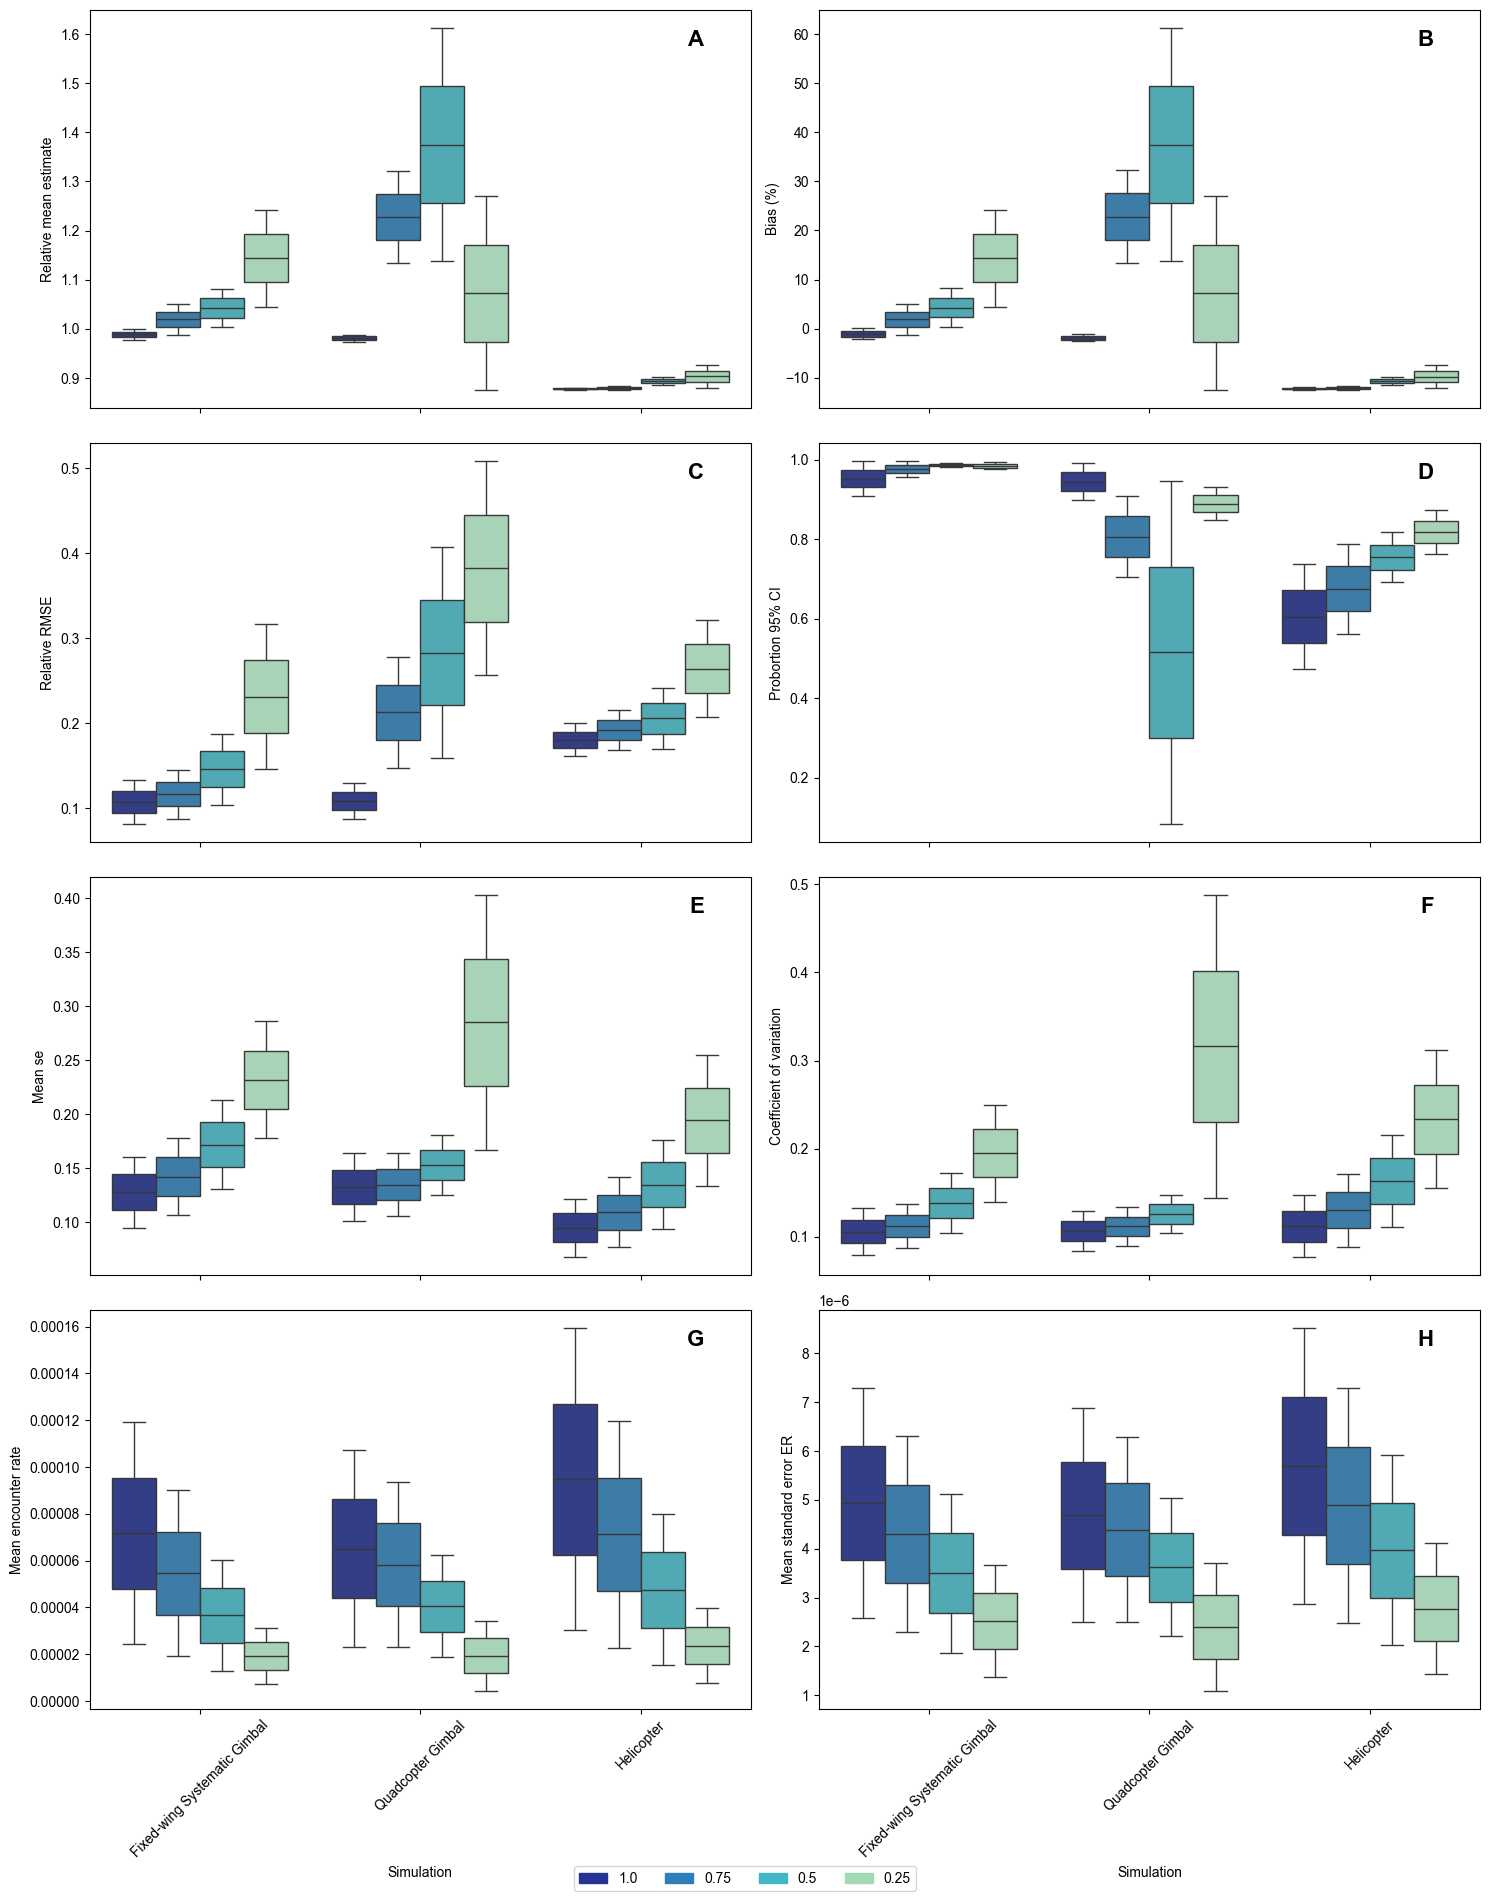

In [6]:

# List of column indices to plot (0-based index)
columns_to_plot = [6, 7, 8, 9, 10, 11, 12, 13]  # Example: columns 4-6

# Number of columns to plot
num_columns = len(columns_to_plot)

# Calculate the number of rows and columns for the subplots
ncols = 2
nrows = math.ceil(num_columns / ncols)

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Letters to annotate subplots
letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

# Define the colors for the four different densities
density_colors = ['#253494', '#2c7fb8', '#41b6c4', '#a1dab4']
density_palette = {density: color for density, color in
                   zip(sorted(df['Density'].unique(), reverse=True), density_colors)}

# Define the order of categories for the x-axis and densities
simulation_order = ['Fixed-wing Systematic Gimbal', 'Quadcopter Gimbal', 'Helicopter']
density_order = sorted(df['Density'].unique(), reverse=True)

# Loop through each specified column in the DataFrame
for i, col_index in enumerate(columns_to_plot):
    column = df.columns[col_index]

    sns.boxplot(x='Simulation', y=column, hue='Density', data=df, ax=axes[i],
                palette=density_palette, order=simulation_order, hue_order=density_order, legend=False)

    # Add letter annotation in the top right corner
    axes[i].text(0.93, 0.95, letters[i], transform=axes[i].transAxes,
                 fontsize=16, fontweight='bold', va='top', ha='right')

    # Add title and labels
    axes[i].set_ylabel(column)

    # Rotate x-axis labels
    axes[i].tick_params(axis='x', rotation=45)

    # Hide x-axis labels for all but the last row of subplots
    if i < (nrows - 1) * ncols:
        axes[i].set_xlabel('')
        axes[i].set_xticklabels([])

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Create custom legend handles for 'Density'
legend_handles = [Patch(color=color, label=density) for density, color in density_palette.items()]

# Add the legend to the figure
fig.legend(handles=legend_handles, loc='lower center', ncol=4)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make space for the legend

# Show the plot
plt.show()

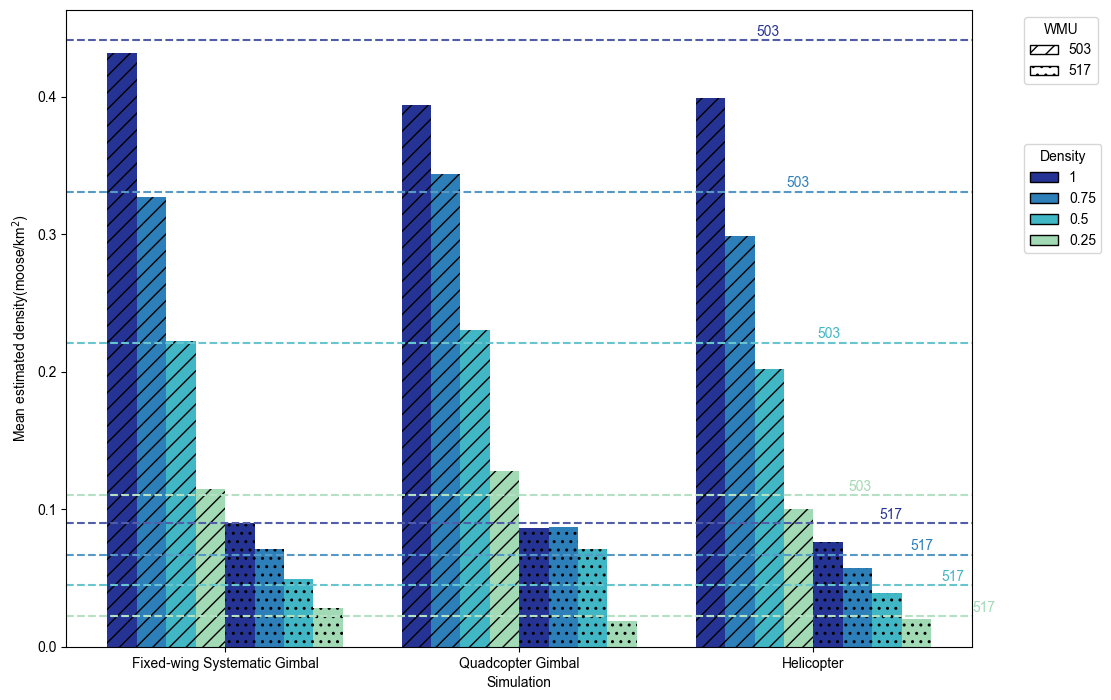

In [7]:
# Function to lighten a color
def lighten_color(color, amount=0.5):
    try:
        c = mcolors.cnames[color]
    except KeyError:
        c = color
    c = np.array(mcolors.to_rgba(c))
    white = np.array(mcolors.to_rgba('white'))
    return mcolors.to_hex((1 - amount) * c[:3] + amount * white[:3])


# Predefined colors for each Density value, 4-class GnBu
density_colors = {
    1: '#253494',  # White ish
    0.75: '#2c7fb8',  # Light
    0.5: '#41b6c4',  # Medium
    0.25: '#a1dab4'  # Dark
}

# Create lighter colors for each Density value
density_lighter_colors = {density: lighten_color(color, 0.2) for density, color in density_colors.items()}

# Predefined hatches for each WMU
wmu_hatches = {
    '503': '//',  # Diagonal lines
    '517': '..'  # Crosshatch
}

# Custom legend labels
wmu_labels = {
    '503': '503',
    '517': '517'
}

# Plotting
fig, ax = plt.subplots(figsize=(11.69, 8.27))  # A4 size in landscape orientation

# Define the order of categories for the x-axis and densities
simulation_order = ['Fixed-wing Systematic Gimbal', 'Quadcopter Gimbal', 'Helicopter']
density_order = sorted(df['Density'].unique(), reverse=True)

# Calculate the width of each bar and the positions
bar_width = 0.1
num_wmus = len(wmu_hatches)
positions = np.arange(len(simulation_order))

# Group by WMU and plot each group
for wmu_index, (key, grp) in enumerate(df.groupby('WMU')):
    for i, density in enumerate(density_order):
        density_grp = grp[grp['Density'] == density]
        if density_grp.empty:
            continue
        color = density_colors[density]
        lighter_color = density_lighter_colors[density]
        hatch = wmu_hatches.get(str(key), '')  # Default to no hatch if WMU not found
        label = f"{wmu_labels.get(str(key), key)} - {density}"
        ax.bar(positions + (wmu_index * len(density_order) + i) * bar_width, density_grp['Mean estimated Density'],
               bar_width, label=label, color=color, hatch=hatch)
        true_density = density_grp['True Density'].iloc[0]  # Assuming True Density is the same for each group
        ax.axhline(y=true_density, linestyle='--', color=lighter_color, label='_nolegend_')
        # Add text annotation for WMU at the True Density line
        max_xlim = ax.get_xlim()[1]
        ax.text(max_xlim, true_density + 0.001, f"{wmu_labels.get(str(key), key)}",
                verticalalignment='bottom', color=color)

# Adding labels and title
ax.set_xlabel('Simulation')
ax.set_ylabel('Mean estimated density(moose/km$^2$)')
ax.set_xticks(positions + bar_width * (num_wmus * len(density_order) - 1) / 2)
ax.set_xticklabels(simulation_order)
# ax.set_title('Bar Plot of Simulation vs Mean estimated Density')

# Create custom legends

# Legend for WMU hatches
wmu_legend = [Patch(facecolor='white', edgecolor='black', hatch=wmu_hatches[key], label=wmu_labels[key]) for key in
              wmu_hatches]

# Legend for Density colors
density_legend = [Patch(facecolor=color, edgecolor='black', label=str(density)) for density, color in
                  density_colors.items()]

# Add legends to the plot
legend1 = ax.legend(handles=wmu_legend, title='WMU', bbox_to_anchor=(1.05, 1), loc='upper left')
legend2 = ax.legend(handles=density_legend, title='Density', bbox_to_anchor=(1.05, 0.8), loc='upper left')

# Add the first legend back
ax.add_artist(legend1)

# Adjust plot limits to make space for the labels
# ax.set_xlim(right=ax.get_xlim()[1] + 0.5)

# Save the plot as a TIFF file to the specified relative path
output_path = os.path.join('..', '..', 'Output', 'Plots', 'meanVarDensity.tiff')
plt.savefig(output_path, format='tiff', dpi=300, bbox_inches='tight')

# Show plot
plt.show()